# Ridge Regression

In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
import numpy as np

In [101]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=25,
    coef=True,
    random_state=1
)

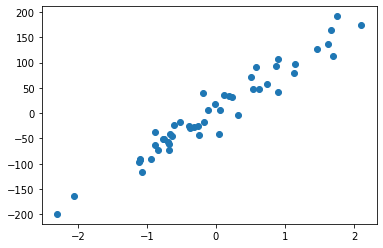

In [3]:
plt.scatter(X, y)

In [4]:
rr = Ridge(alpha=0)
rr.fit(X, y)
w = rr.coef_
rr.intercept_, w

(5.461106129084674, array([84.93241565]))

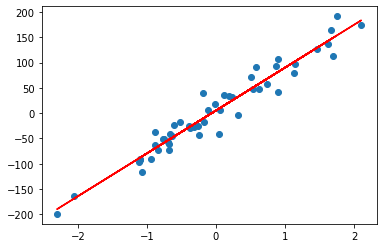

In [5]:
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

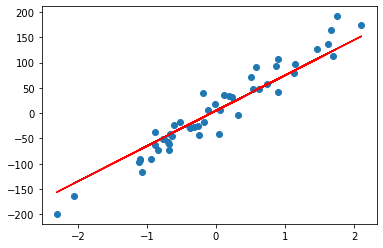

In [6]:
rr = Ridge(alpha=10)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

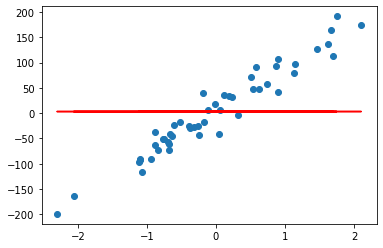

In [7]:
rr = Ridge(alpha=1000000)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

In [8]:
rr.intercept_, rr.coef_

(3.294170310146944, array([0.00399207]))

## Lasso Regression

#### Fit a linear model using sklearn with Lasso regularization

In [9]:
from sklearn import linear_model

In [10]:
reg = linear_model.Lasso(alpha=10000)

In [11]:
reg.fit(X,y)

Lasso(alpha=10000)

In [12]:
w0 = reg.intercept_

In [13]:
w  = reg.coef_[0]

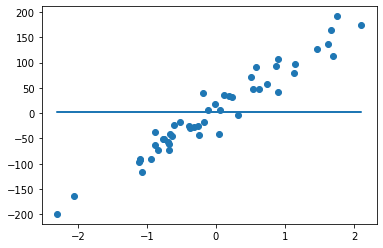

In [14]:
plt.scatter(X,y)
plt.plot(X, w0+ w*X)

## Implement function
`fit_1d_ridge_regression` that takes two vectors $x$ and $y$ and int lmb, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope using ridge regression matrix form.

In [15]:

def fit_1d_ridge_regression(data_vector, response_vector, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    """
    #TODO (closed form solution or gradient descent)

    data_vector = np.concatenate((np.ones(data_vector.shape),data_vector), axis = 1)
    x = data_vector
    Y = y.reshape(y.shape[0],1)
    w = np.linalg.inv(np.dot(np.transpose(x),x)+lmb*np.identity(2))@(np.transpose(x)@Y)
    return(w)
    

In [16]:
w = fit_1d_ridge_regression(X, y, 3)

In [46]:
def lmb_wpart_gradient(x,y,w):
    wNext= np.zeros(((x[0].shape)[0],1))
    for i in  range(len(wNext)):
        if w[i][0]>=0:
            wNext[i][0] = 1
        else:
            wNext[i][0] = 0
    return wNext
            
    

In [92]:
def fit_1d_lasso_regression(data_vector, response_vector, n_iterations = 1000, learning_rate = 0.1, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    #TODO (Gradient descent ((full) batch gradient descent, stochastic gradient descent or mini-batch (stochastic) gradient descent))
    x = data_vector 
    y = response_vector
   
    x = np.concatenate((np.ones(x.shape),x), axis = 1)
    w = np.zeros(((x[0].shape)[0],1))
 
    
    for i in range(n_iterations):
        w = w- learning_rate*(((-2*np.transpose(x))@(y.reshape(((x.shape)[0]),1)-x@w))+ lmb*lmb_wpart_gradient(x,y,w))
    return w


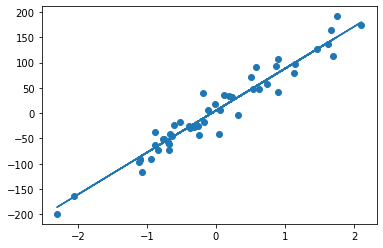

In [48]:
ridge_w = fit_1d_ridge_regression(X,y)
plt.scatter(X,y)
x1 = np.concatenate((np.ones(X.shape),X), axis = 1)
plt.plot(X, x1@ridge_w)


<ipython-input-92-16345cba4762>:20: RuntimeWarning: overflow encountered in matmul
  w = w- learning_rate*(((-2*np.transpose(x))@(y.reshape(((x.shape)[0]),1)-x@w))+ lmb*lmb_wpart_gradient(x,y,w))
<ipython-input-92-16345cba4762>:20: RuntimeWarning: invalid value encountered in matmul
  w = w- learning_rate*(((-2*np.transpose(x))@(y.reshape(((x.shape)[0]),1)-x@w))+ lmb*lmb_wpart_gradient(x,y,w))
<ipython-input-92-16345cba4762>:20: RuntimeWarning: invalid value encountered in subtract
  w = w- learning_rate*(((-2*np.transpose(x))@(y.reshape(((x.shape)[0]),1)-x@w))+ lmb*lmb_wpart_gradient(x,y,w))


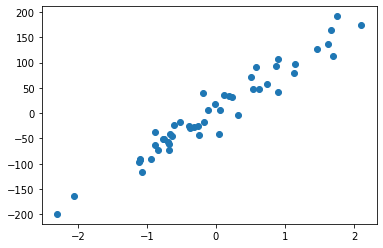

In [93]:
lasso_w = fit_1d_lasso_regression(X,y)
plt.scatter(X,y)
x1 = np.concatenate((np.ones(X.shape),X), axis = 1)
plt.plot(X, x1@lasso_w)


